### Hacktiv8 Talent Fair November 2022
- Peserta: Azis Muslim DS 013
- Dataset: MNC_Dataset

## Analisis Model Machine Larning untuk Klasifikasi Acara Pada MNC Dataset

### Latar Belakang
- Permasalahan yang paling banyak memakan waktu dalam workflow pekerjaan adalah melabeli suatu dataset, karena jika dilakukan secara manual akan sangat membuang waktu. Tujuan dibuatnya model klasifikasi acara siaran menggunakan machine learning adalah untuk memangkas waktu pengelompokkan suatu acara tanpa harus memilahnya secara satu per satu. Model Machine Learning Classifier ini diharapkan dapat memecahkan permasalahan yang ada

In [147]:
# Library yag digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn import preprocessing
import seaborn as sns

In [148]:
# Kode ini digunakan untuk membaca dataset CSV
df_media = pd.read_csv('media_data.csv')
df_media

,Unnamed: 0,viewers_id,content_id,hit_timestamp,user_type,category_id,tagging,creator_id,category_name,viewers_birthdate,viewers_gender,viewers_region
0,0,UN-RY8dNmQ,OC0RuX,2022-07-30,Anonymus User,23.0,"[{""tag_id"": ""l33saH"", ""tag_name"": ""nathalie-ho...",99jY83,Hiburan,NaN,NaN,NaN
1,1,UN-RY8dNmQ,OC0RuX,2022-07-30,Anonymus User,23.0,"[{""tag_id"": ""l33saH"", ""tag_name"": ""nathalie-ho...",99jY83,Hiburan,NaN,NaN,NaN
2,2,UN-b1g5Cc6,EsWkCd,2022-07-31,Anonymus User,23.0,"[{""tag_id"": ""Tw9Th4"", ""tag_name"": ""deddy-corbu...",99jY83,Hiburan,NaN,NaN,NaN
3,3,UN-b1g5Cc6,EsWkCd,2022-07-31,Anonymus User,23.0,"[{""tag_id"": ""Tw9Th4"", ""tag_name"": ""deddy-corbu...",99jY83,Hiburan,NaN,NaN,NaN
4,4,UN-kNqX0xJ,WMKZwi,2022-07-31,Anonymus User,23.0,"[{""tag_id"": ""MSDG2f"", ""tag_name"": ""valencia-ta...",99jY83,Hiburan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
958542,958542,KTq08K,1BZ98E,2022-08-29,Register User,13.0,NaN,39jZ02,Humor,1987-11-05,Male,Jakarta
958543,958543,UN-eRISZYj,1BZ98E,2022-08-29,Anonymus User,13.0,NaN,39jZ02,Humor,NaN,NaN,NaN
958544,958544,KTq08K,1BZ98E,2022-08-29,Register User,13.0,NaN,39jZ02,Humor,1987-11-05,Male,Jakarta
958545,958545,UN-DHiHLsN,bDrGRd,2022-08-12,Anonymus User,13.0,"[{""tag_id"": ""D5mK4C"", ""tag_name"": ""dunia-polit...",99jY83,Humor,NaN,NaN,NaN


Berdasarkan MNC media dataset di atas dapat terlihat jumlah dataset yang akan di analisa memiliki 9.58.547 baris dan 12 kolom

In [149]:
# Kode ini digunakan untuk menampilkan lima baris paling atas dari dataset
df_media.head(5)

,Unnamed: 0,viewers_id,content_id,hit_timestamp,user_type,category_id,tagging,creator_id,category_name,viewers_birthdate,viewers_gender,viewers_region
0,0,UN-RY8dNmQ,OC0RuX,2022-07-30,Anonymus User,23.0,"[{""tag_id"": ""l33saH"", ""tag_name"": ""nathalie-ho...",99jY83,Hiburan,NaN,NaN,NaN
1,1,UN-RY8dNmQ,OC0RuX,2022-07-30,Anonymus User,23.0,"[{""tag_id"": ""l33saH"", ""tag_name"": ""nathalie-ho...",99jY83,Hiburan,NaN,NaN,NaN
2,2,UN-b1g5Cc6,EsWkCd,2022-07-31,Anonymus User,23.0,"[{""tag_id"": ""Tw9Th4"", ""tag_name"": ""deddy-corbu...",99jY83,Hiburan,NaN,NaN,NaN
3,3,UN-b1g5Cc6,EsWkCd,2022-07-31,Anonymus User,23.0,"[{""tag_id"": ""Tw9Th4"", ""tag_name"": ""deddy-corbu...",99jY83,Hiburan,NaN,NaN,NaN
4,4,UN-kNqX0xJ,WMKZwi,2022-07-31,Anonymus User,23.0,"[{""tag_id"": ""MSDG2f"", ""tag_name"": ""valencia-ta...",99jY83,Hiburan,NaN,NaN,NaN


In [150]:
# Kode ini digunakan untuk menampilkan lima baris paling bawah dari dataset
df_media.tail(5)

,Unnamed: 0,viewers_id,content_id,hit_timestamp,user_type,category_id,tagging,creator_id,category_name,viewers_birthdate,viewers_gender,viewers_region
958542,958542,KTq08K,1BZ98E,2022-08-29,Register User,13.0,NaN,39jZ02,Humor,1987-11-05,Male,Jakarta
958543,958543,UN-eRISZYj,1BZ98E,2022-08-29,Anonymus User,13.0,NaN,39jZ02,Humor,NaN,NaN,NaN
958544,958544,KTq08K,1BZ98E,2022-08-29,Register User,13.0,NaN,39jZ02,Humor,1987-11-05,Male,Jakarta
958545,958545,UN-DHiHLsN,bDrGRd,2022-08-12,Anonymus User,13.0,"[{""tag_id"": ""D5mK4C"", ""tag_name"": ""dunia-polit...",99jY83,Humor,NaN,NaN,NaN
958546,958546,UN-DHiHLsN,bDrGRd,2022-08-12,Anonymus User,13.0,"[{""tag_id"": ""D5mK4C"", ""tag_name"": ""dunia-polit...",99jY83,Humor,NaN,NaN,NaN


In [151]:
# Kode ini digunakan untuk melihat Null yang terdeteksi pada setiap kolom dataset
df_media.isnull().sum()

Unnamed: 0                0
viewers_id                0
content_id                0
hit_timestamp             0
user_type                 0
category_id               0
tagging               38272
creator_id                0
category_name             0
viewers_birthdate    954432
viewers_gender       954432
viewers_region       954559
dtype: int64

Berdasarkan informasi yang ditampilkan dari hasil running kode di atas dapat terlihat bahwa pada dataset mnc media yang memiliki 9.58.547 baris dan 12 kolom. Empat kolom diantaranya terdapat missing value dimana pada kolom tagging terdapat 38.272 missing values, pada kolom viewers_birthdate terdapat 9.54.432 missing values, pada kolom viewers_gender terapat 9.54.432 missing vaues, dan pada kolom viewers_region terdapat 9.54.559 missing values.

In [152]:
# Kode ini digunakan untuk melihat isi pada kolom tangging
df_media['tagging'][0]

'[{"tag_id": "l33saH", "tag_name": "nathalie-holscher", "tag_slug": "nathalie-holscher", "status": 1, "created": {"$date": "2021-11-22T02:32:04.404Z"}, "updateat": {"$date": "0001-01-03T00:00:00.000Z"}, "backgroundimage": "", "tumbimage": "", "source": 2}, {"tag_id": "n3X0Hm", "tag_name": "sidang-cerai-nathalie-holscher", "tag_slug": "sidang-cerai-nathalie-holscher", "status": 1, "created": {"$date": "2022-07-15T08:40:23.444Z"}, "updateat": {"$date": "0001-01-03T00:00:00.000Z"}, "backgroundimage": "", "tumbimage": "", "source": 2}, {"tag_id": "EiUKlV", "tag_name": "perceraian-nathalie-holscher", "tag_slug": "perceraian-nathalie-holscher", "status": 1, "created": {"$date": "2022-07-07T04:15:45.332Z"}, "updateat": {"$date": "0001-01-03T00:00:00.000Z"}, "backgroundimage": "", "tumbimage": "", "source": 2}, {"tag_id": "eK7aRP", "tag_name": "sule", "tag_slug": "sule", "status": 1, "created": {"$date": "2022-07-18T23:53:06.557Z"}, "updateat": {"$date": "0001-01-03T00:00:00.000Z"}, "backgroun

Setelah dilakuakan running pada kolom tangging terapat regular expression seperti $, regular experssion tersebut selanjutnya akan dihilangkan dalam proses cleaning data

In [153]:
# Kode di bawah digunakan untuk menghilangkan symbol $ yang terdapat pada kolom tagging
df_media['tagging'] = df_media['tagging'].str.replace('$', '', regex=False)

In [154]:
# Kode dibawah dijalankan untuk memperlihatkan bahwa symbol $ sudah tidak ada dalam kolom tagging
df_media['tagging'][0]

'[{"tag_id": "l33saH", "tag_name": "nathalie-holscher", "tag_slug": "nathalie-holscher", "status": 1, "created": {"date": "2021-11-22T02:32:04.404Z"}, "updateat": {"date": "0001-01-03T00:00:00.000Z"}, "backgroundimage": "", "tumbimage": "", "source": 2}, {"tag_id": "n3X0Hm", "tag_name": "sidang-cerai-nathalie-holscher", "tag_slug": "sidang-cerai-nathalie-holscher", "status": 1, "created": {"date": "2022-07-15T08:40:23.444Z"}, "updateat": {"date": "0001-01-03T00:00:00.000Z"}, "backgroundimage": "", "tumbimage": "", "source": 2}, {"tag_id": "EiUKlV", "tag_name": "perceraian-nathalie-holscher", "tag_slug": "perceraian-nathalie-holscher", "status": 1, "created": {"date": "2022-07-07T04:15:45.332Z"}, "updateat": {"date": "0001-01-03T00:00:00.000Z"}, "backgroundimage": "", "tumbimage": "", "source": 2}, {"tag_id": "eK7aRP", "tag_name": "sule", "tag_slug": "sule", "status": 1, "created": {"date": "2022-07-18T23:53:06.557Z"}, "updateat": {"date": "0001-01-03T00:00:00.000Z"}, "backgroundimage":

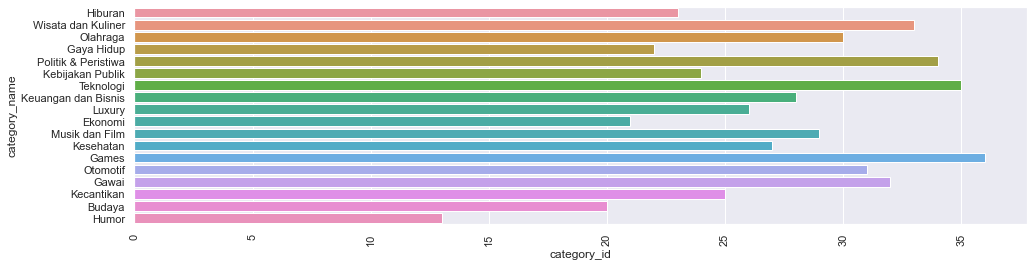

In [155]:
# Kode dibawah digunakan untuk menampilkan barplot antara category_name dan category_id
plt_1 = plt.figure(figsize=(16, 4))
sns.barplot(x=df_media['category_id'],y=df_media['category_name'])
plt.xticks(rotation='vertical')
plt.show()

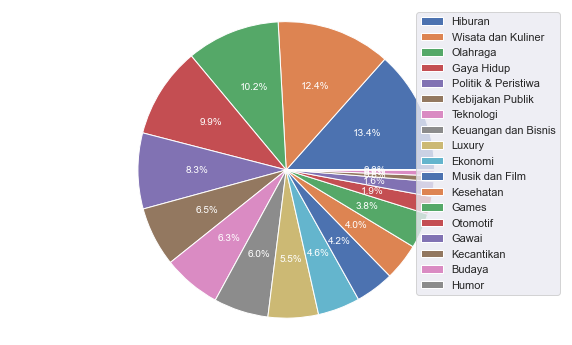

In [156]:
# Kode di bawah digunakan untuk menampilkan pie chart dari kategori acara MNC
plt.figure(figsize=(10,6))
plt.pie(df_media['category_name'].value_counts(), labels=df_media['category_name'].unique(), autopct='%.1f%%', textprops={'color':"w"})
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

Berdasarkan Pie Chart di atas dapat terlihat tiga kategori siaran yang memiiki porsi waktu paling besar adalah Hiburan yang berada di angka 13.4 %, Wisata dan kuliner yang berada di angka 12.4 % dan Olahraga yang berada di angka 10.2 %. Lebih lanjut persentasi terkecil ada di kategori budaya, dan Kebijakan Publik

/var/folders/2r/wbfg0gj94yz2vq2hskl8h_q00000gn/T/ipykernel_6248/819541519.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<AxesSubplot: xlabel='category_id', ylabel='Density'>

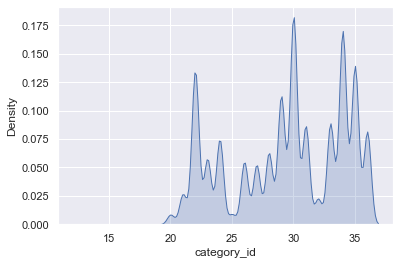

In [157]:
# Kode di bawah digunakan untuk menampilakn distribusi data pada category_id
sns.set(style="darkgrid")
sns.kdeplot(data=df_media['category_id'], shade=True)

category_id adalah sebuah angka yang dibuat dengan urutan secara acak, pada gambar di atas dapat diperlihatkan bahwa category_id adalah angka yang dihasilkan secara acak dan terlihat tidak membentuk pola tertentu pada grafik distribusi di atas

In [158]:
# Kode di bawah dijalankan guna melihat preferensi viewers di wilayah DKI Jakarta
mnc_fr=df_media[df_media['viewers_region']=='Jakarta']
nannef=mnc_fr.dropna()
import plotly.express as px
fig = px.treemap(nannef, path=['viewers_gender','category_name'],
                  color='category_name', hover_data=['category_name','user_type'],color_continuous_scale='Purples')
fig.show()

Preferensi viewers di kota Jakarta dipilih karena Jakarta adalah pusat ekonomi sehingga sangat masuk akal untuk melihat potensi bisnis apa saja yang masih bisa di kembangkan berdasarkan data preferensi siaran yang dipilih oleh customer di kota tersebut

- Pada kelompok Female terlihat bahwa Musik dan Film, Wisata dan Kuliner adalah kategori siaran yang paling dominan dibandingkan kategori lainnya seperti Hiburan, dan Gaya Hidup
- Pada kelompok Male terlihat bahwa Poltik & Peristiwa, Wisata & Kuliner, Gaya Hidup, dan Hiburan adalah kategori siaran yang paling dominan dibandingkan kategori siaran Kebijakan Publik, Gawai, dan Budaya
- Pada kelompok male terlihat Keuangan dan Bisnis, Politik dan Peristiwa adalah kategori siaran yang paling dominan dibandingkan dengan kategori lainnya seperti Kebijakan Publik, Otomotif, dan Teknologi
- Pada kelompok female terlihat Gaya hidup dan Wisata dan Kuliner adalah siaran yang paling dominan jika dibandingkan dengan siaran lainnya seperti Kesehatan, Politik dan Peristiwa, dan Musik dan Film

Dilihat secara keseluruhan berdasarakan preferensi siaran pada Male, Female, male, dan female dapan terlihat perbedaan yang sangat distinctive dimana pada Female dua acara favorite utama adalah Musik dan Film dan Wisata dan Kuliner sedangkan untuk femal dua acara favorite utamanya adalah Gaya Hidup, dan Wisata dan Kuliner

Untuk Male dan male keduanya sama-sama menyukai Politik & Peristiwa sebagai program favorite namun memilik preferensi berbeda untuk acara favorite lainnya dimana male lebih memilih melihat keuangan dan bisnis sedangan Male lebih memilih wisata dan kuliner.

In [159]:
# Kode dibawah digunakan untuk melihat range data
df_media['category_name'].keys()

RangeIndex(start=0, stop=958547, step=1)

In [160]:
# Kode dibawah digunakan untuk melihat jenis data type pada setiap kolom dataset
df_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958547 entries, 0 to 958546
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         958547 non-null  int64  
 1   viewers_id         958547 non-null  object 
 2   content_id         958547 non-null  object 
 3   hit_timestamp      958547 non-null  object 
 4   user_type          958547 non-null  object 
 5   category_id        958547 non-null  float64
 6   tagging            920275 non-null  object 
 7   creator_id         958547 non-null  object 
 8   category_name      958547 non-null  object 
 9   viewers_birthdate  4115 non-null    object 
 10  viewers_gender     4115 non-null    object 
 11  viewers_region     3988 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 87.8+ MB


Informasi dari kode di atas digunakan untuk melihat kesesuaian apakah nama kolom sudah sesuai dengan jenis datanya atau ada beberapa data yang jenis datanya menampilkan anomali. Pada tabel di atas dapat terlihat category_id jenis datanya sudah tepat float64, dan yang lainnya adalah Object dimana hal ini sesuai karena nama kolom yang data type nya Object berisikan data dari column name categrical.

In [161]:
# Kode di bawah digunakan untuk melihat kategori apa saja yang terdapat pada kolom category_name
df_media['category_name'].unique()

array(['Hiburan', 'Wisata dan Kuliner', 'Olahraga', 'Gaya Hidup',
       'Politik & Peristiwa', 'Kebijakan Publik', 'Teknologi',
       'Keuangan dan Bisnis', 'Luxury', 'Ekonomi', 'Musik dan Film',
       'Kesehatan', 'Games', 'Otomotif', 'Gawai', 'Kecantikan', 'Budaya',
       'Humor'], dtype=object)

In [162]:
# Kode di bawah digunakan untuk melihat kolom apa saja yang terdapat pada dataset
df_media.columns

Index(['Unnamed: 0', 'viewers_id', 'content_id', 'hit_timestamp', 'user_type',
       'category_id', 'tagging', 'creator_id', 'category_name',
       'viewers_birthdate', 'viewers_gender', 'viewers_region'],
      dtype='object')

In [164]:
df_mnc = df_media[['category_id','Unnamed: 0', 'viewers_id', 'content_id', 'hit_timestamp', 'user_type',
'tagging', 'creator_id', 'category_name','viewers_birthdate', 'viewers_gender', 'viewers_region']]
df_mnc.head(5)

,category_id,Unnamed: 0,viewers_id,content_id,hit_timestamp,user_type,tagging,creator_id,category_name,viewers_birthdate,viewers_gender,viewers_region
0,23.0,0,UN-RY8dNmQ,OC0RuX,2022-07-30,Anonymus User,"[{""tag_id"": ""l33saH"", ""tag_name"": ""nathalie-ho...",99jY83,Hiburan,NaN,NaN,NaN
1,23.0,1,UN-RY8dNmQ,OC0RuX,2022-07-30,Anonymus User,"[{""tag_id"": ""l33saH"", ""tag_name"": ""nathalie-ho...",99jY83,Hiburan,NaN,NaN,NaN
2,23.0,2,UN-b1g5Cc6,EsWkCd,2022-07-31,Anonymus User,"[{""tag_id"": ""Tw9Th4"", ""tag_name"": ""deddy-corbu...",99jY83,Hiburan,NaN,NaN,NaN
3,23.0,3,UN-b1g5Cc6,EsWkCd,2022-07-31,Anonymus User,"[{""tag_id"": ""Tw9Th4"", ""tag_name"": ""deddy-corbu...",99jY83,Hiburan,NaN,NaN,NaN
4,23.0,4,UN-kNqX0xJ,WMKZwi,2022-07-31,Anonymus User,"[{""tag_id"": ""MSDG2f"", ""tag_name"": ""valencia-ta...",99jY83,Hiburan,NaN,NaN,NaN


Kode di atas dibuat sebagai data copy sehingga jika ada modifikasi data tidak perlu untuk melakukan load dataset dari awal

In [114]:
df_mnc['viewers_birthdate'].isnull().values.sum()

954432

In [115]:
df_mnc['viewers_birthdate']

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
958542    1987-11-05
958543           NaN
958544    1987-11-05
958545           NaN
958546           NaN
Name: viewers_birthdate, Length: 958547, dtype: object

Dua kode blok di atas menjelaskan bahwa jumlah Nan yang terdapat pada kolom viewers_birthdate sangat signifikan dimana terdapat 9.54.432 NaN dari 9.58.547 baris dataset yang ada.

In [117]:
df_mnc['viewers_gender'].isnull().values.sum()

954432

In [118]:
df_mnc['viewers_gender']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
958542    Male
958543     NaN
958544    Male
958545     NaN
958546     NaN
Name: viewers_gender, Length: 958547, dtype: object

Dua kode blok di atas menjelaskan jumlah NaN yang terdapat pada kolom viewers_gender sangat signifikan dimana terdapat 954432 NaN dari 958547 baris dataset yang ada

In [119]:
df_mnc['viewers_region'].isnull().values.sum()

954559

In [120]:
df_mnc['viewers_region']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
958542    Jakarta
958543        NaN
958544    Jakarta
958545        NaN
958546        NaN
Name: viewers_region, Length: 958547, dtype: object

In [165]:
df_mnc['viewers_region'].isnull().values.sum()

954559

Dua kode blok di atas menjelaskan jumlah NaN yang terdapat pada kolom viewers_region sangat signifikan dimana terdapat 954559 NaN dari 958547 baris dataset yang ada

## Feature Selection

Setelah dilakukan ektraksi informasi dari kolom-kolom yang ada pada MNC dataset di pilih tiga kolom yang informasinya masih bisa di ekstraksi lebih lanjut dengan menggunakan model machine learning

In [126]:
df_copy = df_mnc[['hit_timestamp','category_name','tagging']]
df_copy

,hit_timestamp,category_name,tagging
0,2022-07-30,Hiburan,"[{""tag_id"": ""l33saH"", ""tag_name"": ""nathalie-ho..."
1,2022-07-30,Hiburan,"[{""tag_id"": ""l33saH"", ""tag_name"": ""nathalie-ho..."
2,2022-07-31,Hiburan,"[{""tag_id"": ""Tw9Th4"", ""tag_name"": ""deddy-corbu..."
3,2022-07-31,Hiburan,"[{""tag_id"": ""Tw9Th4"", ""tag_name"": ""deddy-corbu..."
4,2022-07-31,Hiburan,"[{""tag_id"": ""MSDG2f"", ""tag_name"": ""valencia-ta..."
...,...,...,...
958542,2022-08-29,Humor,NaN
958543,2022-08-29,Humor,NaN
958544,2022-08-29,Humor,NaN
958545,2022-08-12,Humor,"[{""tag_id"": ""D5mK4C"", ""tag_name"": ""dunia-polit..."


In [127]:
df_copy['hit_timestamp'].min()

'2022-07-30'

In [128]:
df_copy['hit_timestamp'].max()

'2022-11-13'

## Creating Data Inference

In [129]:
data_inf = df_copy.sample(10, random_state=17)
data_inf.head(5)

,hit_timestamp,category_name,tagging
676611,2022-08-15,Luxury,NaN
897234,2022-08-18,Otomotif,"[{""tag_id"": ""cU7db3"", ""tag_name"": ""ferrari"", ""..."
728119,2022-08-16,Musik dan Film,"[{""tag_id"": ""Braqsn"", ""tag_name"": ""series"", ""t..."
737449,2022-08-19,Musik dan Film,"[{""tag_id"": ""f92f4044f79d402db9042a3c5b441a81""..."
675579,2022-11-12,Luxury,"[{""tag_id"": ""EsG8NE"", ""tag_name"": ""kehilangan-..."


In [130]:
data_train_test = df_copy.drop(data_inf.index)
data_train_test.head(5)

,hit_timestamp,category_name,tagging
0,2022-07-30,Hiburan,"[{""tag_id"": ""l33saH"", ""tag_name"": ""nathalie-ho..."
1,2022-07-30,Hiburan,"[{""tag_id"": ""l33saH"", ""tag_name"": ""nathalie-ho..."
2,2022-07-31,Hiburan,"[{""tag_id"": ""Tw9Th4"", ""tag_name"": ""deddy-corbu..."
3,2022-07-31,Hiburan,"[{""tag_id"": ""Tw9Th4"", ""tag_name"": ""deddy-corbu..."
4,2022-07-31,Hiburan,"[{""tag_id"": ""MSDG2f"", ""tag_name"": ""valencia-ta..."


In [131]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf.head(5)

,hit_timestamp,category_name,tagging
0,2022-08-15,Luxury,NaN
1,2022-08-18,Otomotif,"[{""tag_id"": ""cU7db3"", ""tag_name"": ""ferrari"", ""..."
2,2022-08-16,Musik dan Film,"[{""tag_id"": ""Braqsn"", ""tag_name"": ""series"", ""t..."
3,2022-08-19,Musik dan Film,"[{""tag_id"": ""f92f4044f79d402db9042a3c5b441a81""..."
4,2022-11-12,Luxury,"[{""tag_id"": ""EsG8NE"", ""tag_name"": ""kehilangan-..."


In [132]:
x = data_train_test.drop('category_name', axis=1)
y = data_train_test['category_name']
x.head(5)

,hit_timestamp,tagging
0,2022-07-30,"[{""tag_id"": ""l33saH"", ""tag_name"": ""nathalie-ho..."
1,2022-07-30,"[{""tag_id"": ""l33saH"", ""tag_name"": ""nathalie-ho..."
2,2022-07-31,"[{""tag_id"": ""Tw9Th4"", ""tag_name"": ""deddy-corbu..."
3,2022-07-31,"[{""tag_id"": ""Tw9Th4"", ""tag_name"": ""deddy-corbu..."
4,2022-07-31,"[{""tag_id"": ""MSDG2f"", ""tag_name"": ""valencia-ta..."


### Splitting Dataset

Pada bagian ini dilakukan Splitting Dataset, Splitting Dataset sendiri berguna untuk menghindari terjadinya data leak pada saat traning model. 

In [133]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=17)

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)

Train Size : (766829, 2)
Test Size : (191708, 2)


In [166]:
# Kode dibawah digunakan untuk memisahakan numerik variabel dan catogorical variabel yang terdapat pada dataset
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns :', num_columns)
print('Categorical Columns :', cat_columns)

Numerical Columns : []
Categorical Columns : ['hit_timestamp', 'tagging']


In [135]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_cat

,hit_timestamp,tagging
35978,2022-09-01,"[{""tag_id"": ""3qc9fR"", ""tag_name"": ""surat-ad-dh..."
129048,2022-11-11,"[{""tag_id"": ""L4rnSt"", ""tag_name"": ""barcelona"",..."
579731,2022-09-08,"[{""tag_id"": ""vw5MMr"", ""tag_name"": ""microsoft"",..."
252353,2022-11-12,"[{""tag_id"": ""F7ue9I"", ""tag_name"": ""putri-candr..."
122429,2022-08-29,"[{""tag_id"": ""7dR0ZR"", ""tag_name"": ""barcelona"",..."
...,...,...
125680,2022-08-14,"[{""tag_id"": ""Uf5Opm"", ""tag_name"": ""bulutangkis..."
828729,2022-08-15,"[{""tag_id"": ""vAsGPp"", ""tag_name"": ""pubg"", ""tag..."
491926,2022-08-18,"[{""tag_id"": ""9DcTb2"", ""tag_name"": ""ganja"", ""ta..."
297103,2022-08-18,"[{""tag_id"": ""91aX0v"", ""tag_name"": ""artis"", ""ta..."


## Encoding Dataset

Pada bagian encoding dataset ini label encoder dipilih karena tidak ada perulangan dari categorical variable yang akan di encoding.

In [136]:
le = preprocessing.LabelEncoder()
X_test_cat['tagging'] = le.fit_transform(X_test_cat['tagging'])
X_train_cat['tagging'] = le.fit_transform(X_train_cat['tagging'])

In [137]:
le = preprocessing.LabelEncoder()
X_test_cat['hit_timestamp'] = le.fit_transform(X_test_cat['hit_timestamp'])
X_train_cat['hit_timestamp'] = le.fit_transform(X_train_cat['hit_timestamp'])

In [138]:
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [139]:
X_train_final = np.concatenate([X_train_num,X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num,X_test_cat], axis=1)
X_train_final

array([[1.3000e+01, 1.3290e+03],
       [1.8000e+01, 5.9170e+03],
       [1.5000e+01, 1.6263e+04],
       ...,
       [8.0000e+00, 2.8590e+03],
       [8.0000e+00, 2.7750e+03],
       [9.0000e+00, 1.4041e+04]])

## Building Machine Learning Model

In [140]:
log_reg = LogisticRegression()
model = log_reg.fit(X_train_final, y_train)

/Users/macbookair/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [141]:
y_pred_train = model.predict(X_train_final)
y_pred_test = model.predict(X_test_final)

## Metrics Valuation for Logistic Regression Model

In [142]:
print('accuracy score train : ',accuracy_score(y_train,y_pred_train))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test))

accuracy score train :  0.13515529537876111
accuracy score test :  0.13524213908652744


In [143]:
model.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

Hasil dari kode di atas memperlihatkan kelas klasifikasi pada dataset ada 18

In [144]:
model.coef_

array([[-1.41794761e-02,  2.17161481e-05],
       [-2.90810691e-02,  2.88836293e-04],
       [-2.35350805e-02,  3.77355531e-04],
       [-1.37916552e-02,  2.19521992e-04],
       [ 5.18423840e-02,  3.54705024e-04],
       [-2.47029983e-03,  3.39274946e-04],
       [-6.66684620e-04, -5.39302462e-03],
       [ 3.16993833e-03,  3.41754387e-04],
       [-9.05223665e-03,  8.16791396e-05],
       [-5.90947294e-03,  3.34535929e-04],
       [-1.93502731e-02,  3.58294178e-04],
       [-4.88901922e-02,  3.88247127e-04],
       [ 9.50048617e-04,  3.89871466e-04],
       [ 6.90581548e-02,  3.79923745e-04],
       [ 7.80060928e-03,  3.37345702e-04],
       [ 3.17045258e-02,  3.87790754e-04],
       [ 2.56357629e-02,  3.94152885e-04],
       [-2.32349836e-02,  3.98019370e-04]])

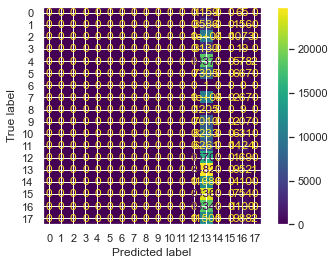

In [145]:
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()
plt.show()

In [146]:
print(classification_report(y_test,y_pred_test))

/Users/macbookair/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/macbookair/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1224
           1       0.00      0.00      0.00      3742
           2       0.00      0.00      0.00     11361
           3       0.00      0.00      0.00      3149
           4       0.00      0.00      0.00     18953
           5       0.00      0.00      0.00      7972
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00     10510
           8       0.00      0.00      0.00      1214
           9       0.00      0.00      0.00      7217
          10       0.00      0.00      0.00      8864
          11       0.00      0.00      0.00      7685
          12       0.00      0.00      0.00     15878
          13       0.14      0.96      0.24     25778
          14       0.00      0.00      0.00     12096
          15       0.00      0.00      0.00     24123
          16       0.12      0.06      0.08     19446
          17       0.40    

/Users/macbookair/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Berdasarkan hasil classification report di atas di dapat nilai akurasi yang masih rendah sehingga model machine lerning masih perlu dikembangan lebih lanjut dalam melakukan klasifikasi acara yang ada pada siaran MNC

## Conclusion

Setelah dilakukan analisa data pada dataset MNC terdapat beberapa temuan menarik diantaranya. Pelanggan MNC di kota besar seperti Jakarta lebih memilih siaran Wisata & Kuliner baik pada gender perempuan maupun laki-laki. Dilihat secara keseluruhan berdasarakan preferensi siaran pada Male, Female, male, dan female dapan terlihat perbedaan yang sangat distinctive dimana pada Female dua acara favorite utama adalah Musik dan Film dan Wisata dan Kuliner sedangkan untuk femal dua acara favorite utamanya adalah Gaya Hidup, dan Wisata dan Kuliner

Untuk Male dan male keduanya sama-sama menyukai Politik & Peristiwa sebagai program favorite namun memilik preferensi berbeda untuk acara favorite lainnya dimana male lebih memilih melihat keuangan dan bisnis sedangan Male lebih memilih wisata dan kuliner.